## MSc in Applied Modelling & Quantitative Techniques Project: Result Visualization

## Project Title: On studying the performance of Hadoop Map Reduce vs MPI for Aggregation Operations: A Big Data Challenge
Author: Devang Swami 

Date: 11th November, 2018

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Map-Reduce Hadoop perfromance visualization:

In [30]:
##Read the result data files 
df_BlockSize = pd.read_csv("block_size_Results.csv")
df_InputSplitSize = pd.read_csv("IS_size_Results.csv")
df_InputMRStages = pd.read_csv("IS_MRStages_Results.csv")
df_Compression = pd.read_csv("compression_Results.csv")


**Visualization 1: Performance comparison of Map Reduce tasks when varying block size:**

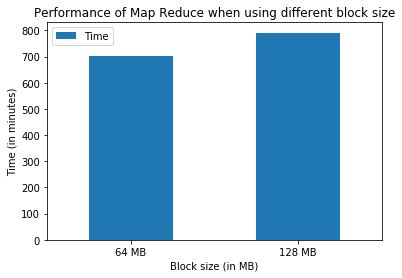

In [19]:
df_BlockSize.plot(kind="bar", x='BlockSize')
plt.xlabel("Block size (in MB)")
plt.ylabel("Time (in minutes)")
plt.xticks(rotation=0)
plt.title("Performance of Map Reduce when using different block size")
plt.show()

Keeping the input split size constant  at 64 MB, uber mode disabled and Snappy compression format, we found that larger block-size performs better than the lower value when using Wall clock time as a parameter as shown in plot above. Although, I have no conclusive theory but it’s clear that larger block size takes less time to compute mapper operation. One lead could be that index were readily available that allowed faster access to the data, but that dosenot explain all the performance that is received. 

**Visualization 2: Performance comparison of Map Reduce tasks when varying input split size:**

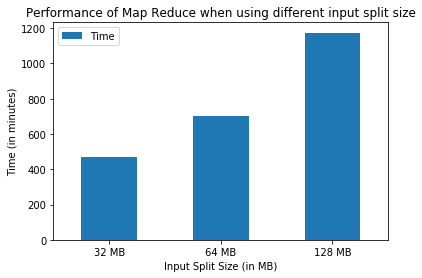

In [21]:
df_InputSplitSize.plot(kind="bar", x='InputSplitSize')
plt.xlabel("Input Split Size (in MB)")
plt.ylabel("Time (in minutes)")
plt.xticks(rotation=0)
plt.title("Performance of Map Reduce when using different input split size")
plt.show()

Keeping the block size constant at 128 MB, uber mode disabled, and snappy compression format. We have conclusive evidence that larger Input-split size performs better as demonstrated in the figure above. The reason being the fact that overload associated with spinning a new mapper function is really high. For instance average time to execute a mapper on 64 MB Input split size vs 128 MB split size were 14 second and 16 second respectively. Now given than a difference of 2 second can process 64 MB of data more, it makes sense as to why a higher input-split size is better. However, it’s been recommended not to keep input split-size greater than block size on official Apache Hadoop website.  

**Visualization 3: Impact of Compression on Map Reduce Task**

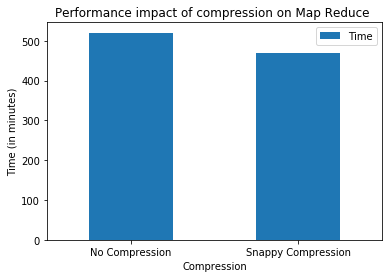

In [22]:
df_Compression.plot(kind="bar", x='Compression')
plt.xlabel("Compression")
plt.ylabel("Time (in minutes)")
plt.xticks(rotation=0)
plt.title("Performance impact of compression on Map Reduce ")
plt.show()

Keeping the Input split size constant at 128 MB, uber mode disabled, and block size of 128 MB. It is found that use of snappy compression helps reduce processing time during the following stage of Map-Reduce Framework: “Shuffle”, “Merge”, and “Reduce” as presented in the plot below. Thus, compression helps reduce task completion time in Map Reduce. 

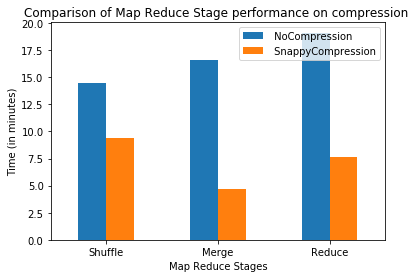

In [33]:
df_InputMRStages.plot(kind='bar', x='MapReduceStage')
plt.xlabel("Map Reduce Stages")
plt.ylabel("Time (in minutes)")
plt.xticks(rotation=0)
plt.title("Comparison of Map Reduce Stage performance on compression ")
plt.show()

### MPI perfromance visualization:
**Visualization 1: Performance of MPI on sequential vs concurrent read of data:**

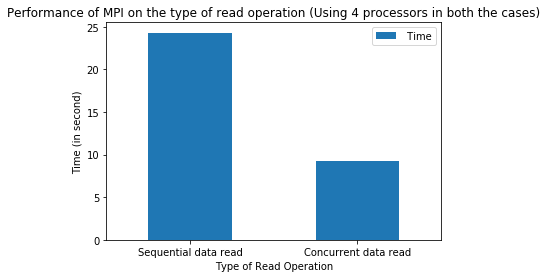

In [36]:
##Read the data
df_MPI = pd.read_csv("mpi_results.csv")
#Plot the graph
df_MPI.plot(kind="bar", x='Version')
plt.xlabel("Type of Read Operation")
plt.ylabel("Time (in second)")
plt.xticks(rotation=0)
plt.title("Performance of MPI on the type of read operation (Using 4 processors in both the cases)")
plt.show()

The concurrent read version of MPI performs better than the sequential version and the performance improvement gained is a little less than expected improvement because of the new overhead associated with reading the file in parallel.